In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# 读取数据
data = pd.read_csv(r"E:\大学\综合项目实践\归一&特征选择&bp\Z-Score标准化.csv")

# 划分特征和目标变量
X = data[['Prcp','Discharge_lag_1','Discharge_lag_2','Discharge_lag_3','Discharge_lag_4','Discharge_lag_5']]
y = data['Discharge']

# 划分数据集
train_years = 1461  # 前4年的数据
X_train, X_test = X[:train_years].values, X[train_years:].values
y_train, y_test = y[:train_years].values, y[train_years:].values

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义SVR模型
model = SVR(kernel='rbf', C=100, gamma=0.1)  # 根据需要选择核函数和参数

# 训练模型
model.fit(X_train_scaled, y_train)

# 评估模型
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R^2:", r2)

# 可以输出预测值和真实值进行对比
print("Predicted values:", y_pred)
print("True values:", y_test)


Test MSE: 3157.8409915807097
Test MAE: 17.942896449964074
Test R^2: 0.6270010077174539
Predicted values: [100.93283752  92.77420046  72.93334145  68.32611859  74.86048069
  75.92503718  74.06491783  66.25889347  60.82439303  58.61696899
  60.89711888  58.1580079   40.56028574  36.86923347  34.53677682
  32.71543656  30.47688587  30.72139329  29.31678317  29.18198892
  36.69041259  33.38141257  32.46492531  32.16736042  32.39585069
  31.16685678  30.4090926   49.12672501  31.86644701  38.16465019
  77.45575983  49.07419443  43.04969026  39.96543029  38.51660485
  36.98204688  34.63034904  33.29262028  32.23534417  31.25792011
  29.03881723  28.03863272  27.62189247  27.33900792  27.2516165
  27.0993969   26.98498045  26.39637995  26.32619472  25.03576571
  24.85576549  24.00014658  26.32947029  23.30010391  26.85206394
  68.56208345  94.29963189  92.16211632 105.22427616 219.82288607
 183.65755009 143.13787886 118.31142456 111.6089965  104.15047656
 108.85814537  84.03025823  79.2160698

In [2]:
import numpy as np
# 计算均方误差（Mean Squared Error，MSE）
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# 计算均方根误差（Root Mean Squared Error，RMSE）
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 计算平均绝对误差（Mean Absolute Error，MAE）
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)# 计算决定系数（Coefficient of Determination，R²）


# 计算平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# # 计算相关系数（Pearson Correlation Coefficient，r）
# corr = np.corrcoef(y_test, predictions)[0, 1]
# print("Pearson Correlation Coefficient (r):", corr) 

r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error (MSE): 3157.8409915807097
Root Mean Squared Error (RMSE): 56.19467049089896
Mean Absolute Error (MAE): 17.942896449964074
Mean Absolute Percentage Error (MAPE): 13.580400657839418
Coefficient of Determination (R²): 0.6270010077174539


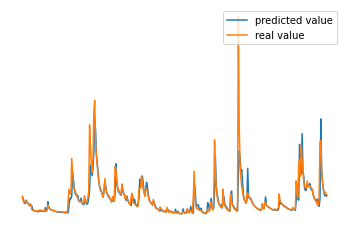

In [3]:
import matplotlib.pyplot as plt
p1 = y_pred
#y1 = X_test[:, 0]
p2 = y_test
#y2 = X_test[:, 0]

plt.plot(p1)
plt.plot(p2)

plt.legend(['predicted value', 'real value'], loc='upper right')
plt.axis('off')
plt.show()
